In [1]:
import pandas as pd
import numpy as np
from nltk import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import Word2Vec
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import nltk
import ssl
import spacy
#try:
#    _create_unverified_https_context = ssl._create_unverified_context
#except AttributeError:
#    pass
#else:
#    ssl._create_default_https_context = _create_unverified_https_context

#nltk.download()

import re
from sklearn.feature_extraction.text import TfidfVectorizer
#nltk.download('punkt')
#nltk.download()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
from textblob import TextBlob

In [2]:
#data3 = pd.read_csv('clean_monsters.csv')

In [4]:
desc = pd.read_csv('monster_desc.csv')

In [5]:
gender = pd.read_csv('monster_gen.csv')

In [6]:
desc.head()

,key,dev_en
0,monster_AoLoong_descriptionKey,"Tired of being a New-Year-Parade Dragon, Ao Lo..."
1,monster_ArchKnight_descriptionKey,Behold the defender of light! This apparition...
2,monster_Arnu_descriptionKey,The poisonous sweat that Arnu produces causes ...
3,monster_Aurinia_descriptionKey,Aurinia belongs to a dynasty of druids. She is...
4,monster_Beefcake_descriptionKey,The rocks are alive! The Beefcake is the most ...


In [7]:
gender.head()

,Name,Gender
0,Treezard,NEUTRAL
1,Firesaur,MALE
2,Greenasaur,FEMALE
3,Pandaken,MALE
4,Rockilla,NEUTRAL


In [8]:
print(desc.shape)
print(gender.shape)

(5022, 2)
(887, 2)


In [9]:
#First clean description data frame 

In [10]:
desc = desc[desc['key'].str.contains("descriptionKey")]
desc = desc[desc['key'].str.contains("monster")]

In [11]:
txt = "this_is_a_text"
print(txt)

this_is_a_text


In [12]:
def get_name(string):
    new_string = string.str.lower().str.replace('_', ' ').str.split().str[1]
    return new_string

In [13]:
d = (desc
     .assign(
    name=lambda x: get_name(x['key'])
    )
)

In [14]:
d.head()

,key,dev_en,name
0,monster_AoLoong_descriptionKey,"Tired of being a New-Year-Parade Dragon, Ao Lo...",aoloong
1,monster_ArchKnight_descriptionKey,Behold the defender of light! This apparition...,archknight
2,monster_Arnu_descriptionKey,The poisonous sweat that Arnu produces causes ...,arnu
3,monster_Aurinia_descriptionKey,Aurinia belongs to a dynasty of druids. She is...,aurinia
4,monster_Beefcake_descriptionKey,The rocks are alive! The Beefcake is the most ...,beefcake


In [15]:
g = (gender
     .assign(
    name= lambda x: x['Name'].str.lower(),
    Gender= lambda x: x['Gender'].str.lower())
)

In [16]:
df = pd.merge(d,g, on = 'name')

In [17]:
df.head()

,key,dev_en,name,Name,Gender
0,monster_Arnu_descriptionKey,The poisonous sweat that Arnu produces causes ...,arnu,Arnu,male
1,monster_Aurinia_descriptionKey,Aurinia belongs to a dynasty of druids. She is...,aurinia,Aurinia,female
2,monster_Beefcake_descriptionKey,The rocks are alive! The Beefcake is the most ...,beefcake,Beefcake,neutral
3,monster_Blesstle_descriptionKey,"The Blesstle, the Water Realm's ambassadors of...",blesstle,Blesstle,neutral
4,monster_Bloomskips_descriptionKey,Bloomskips feel at home when popping out of da...,bloomskips,Bloomskips,male


In [18]:
male = (df
       .query("Gender == 'male'"))

In [19]:
male.shape

(356, 5)

In [20]:
female = (df
       .query("Gender == 'female'"))

In [56]:
female.shape

(98, 5)

In [58]:
female.head()

,key,dev_en,name,Name,Gender
1,monster_Aurinia_descriptionKey,Aurinia belongs to a dynasty of druids. She is...,aurinia,Aurinia,female
5,monster_Bonbon_descriptionKey,Legends tell of the greatest monster in the wo...,bonbon,Bonbon,female
17,monster_Duchess_descriptionKey,"Rockin' royalty! The Duchess of Disaster, the ...",duchess,Duchess,female
21,monster_Esthirel_descriptionKey,She used to protect the weak by healing and ta...,esthirel,Esthirel,female
22,monster_Fayemelina_descriptionKey,"The most fun, charming and beautiful monster o...",fayemelina,Fayemelina,female


In [22]:
neutral = (df
       .query("Gender == 'neutral'"))

In [23]:
neutral.shape

(139, 5)

In [24]:
# Male 

In [25]:
m = (male
    .assign(desc_clean= lambda x: x['dev_en'].str.lower()
    ))

In [26]:
m.head()

,key,dev_en,name,Name,Gender,desc_clean
0,monster_Arnu_descriptionKey,The poisonous sweat that Arnu produces causes ...,arnu,Arnu,male,the poisonous sweat that arnu produces causes ...
4,monster_Bloomskips_descriptionKey,Bloomskips feel at home when popping out of da...,bloomskips,Bloomskips,male,bloomskips feel at home when popping out of da...
6,monster_Boneticore_descriptionKey,The threat of the Boneticore is not in his jaw...,boneticore,Boneticore,male,the threat of the boneticore is not in his jaw...
7,monster_Bumblesnout_descriptionKey,A swamp dweller with no known predators. Bumbl...,bumblesnout,Bumblesnout,male,a swamp dweller with no known predators. bumbl...
8,monster_Crux_descriptionKey,The perfect combination between metal and a pl...,crux,Crux,male,the perfect combination between metal and a pl...


In [65]:
def get_adjectives(df):

    list_desc = list(df['desc_clean'])
    text_desc = ''.join(list_desc)
    td = re.sub(r'[^\w\s]','', text_desc)
    
    tm_tokens = word_tokenize(td)

    tm_tokens_without_sw = [word for word in tm_tokens if not word in stopwords.words()]
    
    tm_without_sw = ' '.join(tm_tokens_without_sw)
    
    adjectives = get_adjectives(tm_without_sw)
    
    adj = ' '.join(adjectives)
    return adj

In [ ]:
def clean_and_tokenize_desc(df):
    f = (df
    .assign(desc_clean= lambda x: x['dev_en'].str.lower()
    ))
    
    list_desc = list(df['desc_clean'])
    text_desc = ''.join(list_desc)
    td = re.sub(r'[^\w\s]','', text_desc)
    
    tm_tokens = word_tokenize(td)
    return tm_tokens

In [66]:
f = (female
    .assign(desc_clean= lambda x: x['dev_en'].str.lower()
    ))
    
f.head()

,key,dev_en,name,Name,Gender,desc_clean
1,monster_Aurinia_descriptionKey,Aurinia belongs to a dynasty of druids. She is...,aurinia,Aurinia,female,aurinia belongs to a dynasty of druids. she is...
5,monster_Bonbon_descriptionKey,Legends tell of the greatest monster in the wo...,bonbon,Bonbon,female,legends tell of the greatest monster in the wo...
17,monster_Duchess_descriptionKey,"Rockin' royalty! The Duchess of Disaster, the ...",duchess,Duchess,female,"rockin' royalty! the duchess of disaster, the ..."
21,monster_Esthirel_descriptionKey,She used to protect the weak by healing and ta...,esthirel,Esthirel,female,she used to protect the weak by healing and ta...
22,monster_Fayemelina_descriptionKey,"The most fun, charming and beautiful monster o...",fayemelina,Fayemelina,female,"the most fun, charming and beautiful monster o..."


In [67]:
adj_female = get_adjectives(f)

<class 'pandas.core.frame.DataFrame'>
<class 'str'>


TypeError: string indices must be integers

In [27]:
list_male = list(m['desc_clean'])
text_male = ''.join(list_male)

In [28]:
tm = re.sub(r'[^\w\s]','',text_male)

In [29]:
#tm[:1000]

'the poisonous sweat that arnu produces causes hallucinations and is so powerful that it can even affect himself he has to clean himself frequently to stay in controlbloomskips feel at home when popping out of dark tight spaces like pipes just hope that you arent a plumber or hes coming for youthe threat of the boneticore is not in his jaws but in his tail boneticores tail is also his weak spot only the most experienced hunters have survived an encounter with this dangerous beasta swamp dweller with no known predators bumblesnouts main quality is his patience he knows that he does not possess the strongest attacks but the longer you face him the more dangerous he becomesthe perfect combination between metal and a plant crux has the best of both elements he can heal his partners with his nature power but he can also injure the enemies with his dangerous metal rootshard to pronounce harder to kill the almighty great old one is awoken the worst nightmares of all the inhabitants of the new

In [30]:
tm_tokens = word_tokenize(tm)

tm_tokens_without_sw = [word for word in tm_tokens if not word in stopwords.words()]


In [31]:
tm_tokens_without_sw[:10]

['poisonous',
 'sweat',
 'arnu',
 'produces',
 'causes',
 'hallucinations',
 'powerful',
 'even',
 'affect',
 'clean']

In [32]:
tm_without_sw = ' '.join(tm_tokens_without_sw)

In [40]:
#tm_without_sw

In [35]:
def get_adjectives(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "JJ"]

#df['adjectives'] = df['reviews'].apply(get_adjectives)

In [36]:
adjectives = get_adjectives(tm_without_sw)

In [39]:
adj = ' '.join(adjectives)

In [42]:
#adj

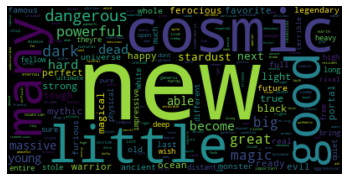

In [41]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(adj)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
common_words = ['new', 'little', 'many']
adjectives_without_common_words = [word for word in adjectives if not word in common_words]

In [48]:
adj_without_common_words = ' '.join(adjectives_without_common_words)

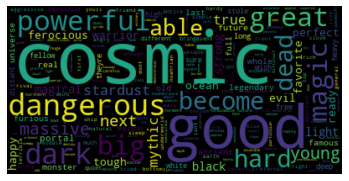

In [49]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(adj_without_common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
#ss = data[['key', 'dev_en']]

In [187]:
ss = data[data['key'].str.contains("descriptionKey")]

In [188]:
ss.head()

,key,dev_en,gender
0,monster_AoLoong_descriptionKey,"Tired of being a New-Year-Parade Dragon, Ao Lo...",m
1,monster_ArchKnight_descriptionKey,Behold the defender of light! This apparition...,n
2,monster_Arnu_descriptionKey,The poisonous sweat that Arnu produces causes ...,m
3,monster_Aurinia_descriptionKey,Aurinia belongs to a dynasty of druids. She is...,f
4,monster_Beefcake_descriptionKey,The rocks are alive! The Beefcake is the most ...,n


In [189]:
ss.shape

(2526, 3)

In [190]:
des = ss['dev_en']

In [191]:
des1 = []
for string in des:
    new = string.replace("-", " ")
    new = new.replace(".", "")
    new = new.replace("!", "")
    new = new.replace("'", "")
    new = new.replace(",", "")
    new = new.lower()
#    new1 = new.split(" ")
    des1.append(new.split())

In [199]:
#des1[0:10]

In [192]:
des2 = np.array(des1)
des2.shape

<ipython-input-192-59178ac23dc8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  des2 = np.array(des1)


(2526,)

In [193]:
text_list = list(des2)

In [197]:
text_list[:1]

[['tired',
  'of',
  'being',
  'a',
  'new',
  'year',
  'parade',
  'dragon',
  'ao',
  'loong',
  'has',
  'decided',
  'to',
  'break',
  'away',
  'from',
  'his',
  'chains',
  'and',
  'start',
  'his',
  'own',
  'adventure',
  'on',
  'this',
  'land',
  'full',
  'of',
  'monsters']]

In [194]:
vectorizer = TfidfVectorizer()

In [195]:
vectorizer.fit(text_list)
# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)

AttributeError: 'list' object has no attribute 'lower'

In [159]:
for count, text in enumerate(text_list):
    #print(count)
    #print(text)
    vector = vectorizer.transform([text_list[count]])
    vector = vector.toarray()
    #print(vector.shape)
    #print(vector.toarray())
    if count == 0:       
        final = vector.reshape(1,5753)
    else:
        vector = vector.reshape(1,5753)
        final = np.concatenate([final, vector], axis=0)

In [160]:
final.shape

(8136, 5753)

In [166]:
d_array = np.array(data)
d_array.shape
#fin = np.concatenate

(5022, 4)

In [129]:
z = vector.toarray()

In [141]:
y = z.reshape(1,5753)
print(y.shape)

(1, 5753)


In [63]:
d = {'clean': des2}
df = pd.DataFrame(data=d)

In [65]:
data['clean']=df

In [103]:
data.clean[1]

'behold the defender of light  this apparition is rumoured to have some very very powerful connection in the netherworlds if youre lucky enough to have this knight saviour appear before you   youll be truly blessed in battle'

In [115]:
train = data[data['gender'].notna()]
test = data[data['gender'].isna()]

In [116]:
train.head()

,key,dev_en,gender,clean
0,monster_AoLoong_descriptionKey,"Tired of being a New-Year-Parade Dragon, Ao Lo...",m,tired of being a new year parade dragon ao loo...
1,monster_ArchKnight_descriptionKey,Behold the defender of light! This apparition...,n,behold the defender of light this apparition ...
2,monster_Arnu_descriptionKey,The poisonous sweat that Arnu produces causes ...,m,the poisonous sweat that arnu produces causes ...
3,monster_Aurinia_descriptionKey,Aurinia belongs to a dynasty of druids. She is...,f,aurinia belongs to a dynasty of druids she is ...
4,monster_Beefcake_descriptionKey,The rocks are alive! The Beefcake is the most ...,n,the rocks are alive the beefcake is the most r...


In [92]:
X_train_tok= [text.split() for text in train['clean']]
X_test_tok= [text.split() for text in test['clean']]

In [113]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(train)
X_test_vectors_tfidf = tfidf_vectorizer.fit_transform(test) 

In [114]:
tfidf_vectorizer.get_feature_names()

['clean', 'dev_en', 'gender', 'key']

In [105]:
#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
def fit(self, X, y):
        return self
def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
#w2v = dict(zip(model.wv.index2word, model.wv.syn0)) 
#data['clean_text_tok']=[nltk.word_tokenize(i) for i in df['clean_text']]
model = Word2Vec(data['clean'],min_count=1)     
#modelw = MeanEmbeddingVectorizer(w2v)
# converting text to numerical data using Word2Vec
#X_train_vectors_w2v = modelw.transform(X_train_tok)
#X_val_vectors_w2v = modelw.transform(X_test_tok)

In [106]:
model

In [80]:
test.shape

(4822, 4)

In [28]:
dictionary = Dictionary(des1)

In [30]:
corpus = [dictionary.doc2bow(doc) for doc in des1]

In [56]:
#corpus[0:3]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1)],
 [(18, 1),
  (23, 2),
  (25, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1)],
 [(2, 1),
  (12, 1),
  (25, 2),
  (39, 1),
  (40, 1),
  (45, 1),
  (49, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 2)]]

In [9]:
print(ss.shape)
keys = ss.shape[0]
print(keys)

(16526, 2)
16526


In [41]:
key = ss[:keys, 0]

In [42]:
key.shape

(16526,)

In [43]:
key1 = []
for string in key:
    new = string.split("_")
    key1.append(new)

In [63]:
key1[1]

['monster', 'AoLoong', 'nameKey']

In [45]:
accepted_keys = ["nameKey", "descriptionKey"]
key2 = []
for sentence in key1:
    for word in sentence:
        #print(word)
        if word in accepted_keys:
            key2.append(word)
        else:
            next

In [70]:
types = ['monster', 'specialSkill', 'skill', 'item']
key3 = []
for sentence in key1:
    for word in sentence:
        #print(word)
        if word in types:
            key3.append(word)
        else:
            next

In [71]:
len(key3)

16424

In [69]:
len(key2)

16304

In [47]:
des = ss[:keys, 1]

In [48]:
des[0]

'Tired of being a New-Year-Parade Dragon, Ao Loong has decided to break away from his chains and start his own adventure on this land full of monsters.'

In [49]:
#des[0].split(" ")

In [50]:
des1 = []
for string in des:
    new = string.replace("-", " ")
    new = new.replace(".", "")
    new = new.replace("!", "")
    new = new.replace("'", "")
    new = new.replace(",", "")
    new = new.lower()
#    new1 = new.split(" ")
    des1.append(new)


In [51]:
#des

In [52]:
data["key_clean"]=pd.DataFrame(key2)
data["des_clean"]=pd.DataFrame(des1)

In [53]:
data.head()

,key,dev_en,sp_status,sp_exclude,sp_deployed_mobile,sp_deployed_canvas,sp_screenshot,sp_character_limit,sp_proofread,sp_add_in_version,...,ln_ko,ln_pt,ln_ru,ln_tr,ln_zh,ln_es-MX,ln_fi,Unnamed: 24,key_clean,des_clean
0,monster_AoLoong_descriptionKey,"Tired of being a New-Year-Parade Dragon, Ao Lo...",DONE,NaN,x,x,NaN,NaN,x,NaN,...,새해 퍼레이드 드래곤 역할에 지친 아오 룽은 체인을 끊고 탈출하여 몬스터가 가득한 ...,Ao Loong estava cansado de ser o dragão do Des...,Устав работать драконом на китайском новогодне...,Yeni Yıl Alayı Ejderhası olmaktan sıkılan Ao L...,敖龙厌倦了街头舞龙的命运，他决心挣脱锁链出逃，在这个怪兽林立的地方闯荡。,Cansado de que lo utilicen en los desfiles de ...,Uudenvuodenparaatilohikäärmeenä toimimiseen vä...,NaN,descriptionKey,tired of being a new year parade dragon ao loo...
1,monster_AoLoong_nameKey,Ao Loong,DONE,NaN,x,x,NaN,NaN,x,NaN,...,아오 룽,Ao Loong,Ао Лунг,Ao Loong,敖龙,Ao Loong,Ao Loong,NaN,nameKey,ao loong
2,monster_ArchKnight_descriptionKey,Behold the defender of light! This apparition...,DONE,NaN,x,x,NaN,NaN,NaN,1.1,...,저 빛의 수호자를 보세요! 지하 세계와 아주 강력한 관계를 갖고 있다는 소문이 도는...,Eis o defensor da luz! Dizem que esta aparição...,"Узрите защитника света! По слухам, у него есть...","Dikkatli ol, ışığın savunucusu! Bu hayaletin d...",瞧，光的守护者！据说此幻影与冥府有非常强大的联系。如果有幸能看到这名骑士救星在眼前出现，你在...,Contemplen al Defensor de la Luz! Se dice que ...,Katso valon puolustajaa! Tällä olennolla on hu...,NaN,descriptionKey,behold the defender of light this apparition ...
3,monster_ArchKnight_nameKey,Arch Knight,DONE,NaN,x,x,NaN,NaN,NaN,1.1,...,수석 기사,Arch Knight,Арк Найт,Arch Knight,高阶骑士,Arch Knight,Arch Knight,NaN,nameKey,arch knight
4,monster_Arnu_descriptionKey,The poisonous sweat that Arnu produces causes ...,DONE,NaN,x,x,NaN,NaN,x,1.1,...,이 생명체의 땀에는 환각을 일으키는 맹독이 있어 아르누는 정신을 잃고 폭주하곤 합니...,O suor venenoso que emana desta criatura causa...,"Ядовитый пот, появляющийся на шкуре этого суще...",Bu yaratığın vücudundan gelen zehirli ter halü...,从亚努身上流出的毒液能够产生幻觉，效果之强让这个生物失控。为了保持清醒，它必须经常进行清洗。,El sudor venenoso que produce Arnu provoca alu...,Arnun myrkyllinen hiki aiheuttaa hallusinaatio...,NaN,descriptionKey,the poisonous sweat that arnu produces causes ...


In [ ]:
dd = data[data["key"].isin([2, 3])

In [56]:
dd = data[['key_clean', 'des_clean']]

In [57]:
dd.head()

,key_clean,des_clean
0,descriptionKey,tired of being a new year parade dragon ao loo...
1,nameKey,ao loong
2,descriptionKey,behold the defender of light this apparition ...
3,nameKey,arch knight
4,descriptionKey,the poisonous sweat that arnu produces causes ...


In [60]:
dd.to_csv('clean_monsters.csv')

In [112]:
new1

['water',
 'artifact',
 'with',
 'multiple',
 'element',
 'attacks',
 'and',
 'bleed',
 '',
 'shock',
 '',
 'and',
 'true',
 'damage']

In [29]:
ss[0,0].split("_")

['monster', 'AoLoong', 'descriptionKey']

In [9]:
ss['key2'] = ss['key'].split("_")

AttributeError: 'Series' object has no attribute 'split'

In [135]:
text = ["The quick brown fox jumped over the lazy dog.",
		"The dog.",
		"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]
